# Entrenamiento de Multiperceptrón con Dataset de Manos
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [ ]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


**Carga del dataset de manos**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics, model_selection

from sklearn.model_selection import cross_val_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import seaborn as sns

# %% CARGA DE DATASET
nom_archivo = DATOS_DIR + 'Fingers/fingers_train.csv'
datos = pd.read_csv(nom_archivo)


# separa características y clase
X = np.array(datos.iloc[:, :-1])
Y = np.array(datos.iloc[:, -1])
nomClases = datos.iloc[:, -1].value_counts()

# Target codificado como one-hot
encoder = preprocessing.LabelEncoder()
Y_nro = encoder.fit_transform(Y)
Y_bin= to_categorical(Y_nro)

# %% --- CONJUNTOS DE ENTRENAMIENTO Y VALIDACION ---
X_train, X_val, Y_train, Y_val = model_selection.train_test_split( \
                                         X, Y_bin, test_size=0.20) #, random_state=42)

normalizador = preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_val = normalizador.transform(X_val)

datos

,Unnamed: 0,AreaNorm,PerimNorm,RazonEjes,Excentricidad,Solidez,Extension,CantDedos
0,0,0.772097,3.455084,0.679345,0.733819,0.932500,0.690741,0.0
1,1,0.747383,3.474195,0.642108,0.766614,0.922849,0.691111,0.0
2,2,0.734556,4.203402,0.766965,0.641689,0.892857,0.636364,0.0
3,3,0.559955,5.950448,0.694749,0.719253,0.576135,0.358647,5.0
4,4,0.537995,5.826754,0.719261,0.694740,0.559078,0.357494,5.0
...,...,...,...,...,...,...,...,...
17994,17994,0.757010,3.479756,0.634391,0.773012,0.920821,0.697778,0.0
17995,17995,0.613490,5.579413,0.636335,0.771413,0.657419,0.486607,4.0
17996,17996,0.754084,3.949160,0.710816,0.703378,0.908416,0.705769,0.0
17997,17997,0.635319,4.658951,0.483027,0.875606,0.714912,0.611250,2.0


**Construye Modelo**

In [ ]:
ENTRADAS = X_train.shape[1]
SALIDAS = Y_train.shape[1]
OCULTAS = 8
EPOCAS = 200
LOTES = 32
PACIENCIA = 5
ACTIVACION = 'tanh'
OPTIMIZADOR = 'adam'


# %% CONSTRUCCION DEL MODELO
model = Sequential()
model.add(Dense(OCULTAS, input_shape=[ENTRADAS], activation=ACTIVACION))
model.add(Dense(SALIDAS, activation='softmax'))
model.summary()  #-- muestra la cantidad de parámetros de la red


model.compile(optimizer=OPTIMIZADOR, loss='categorical_crossentropy', metrics=['accuracy'])

# %% ENTRENAMIENTO

# parada temprana para evitar el sobreajuste
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA)

# entrena el modelo y guarda la historira del progreso
history = model.fit(X_train,Y_train, epochs=EPOCAS, batch_size=LOTES, validation_data = (X_val, Y_val), callbacks=[early_stop])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
Total params: 118 (472.00 Byte)
Trainable params: 118 (472.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
450/450 [==============================] - 3s 4ms/step - loss: 1.3469 - accuracy: 0.4952 - val_loss: 0.9022 - val_accuracy: 0.7042
Epoch 2/200
450/450 [==============================] - 1s 2ms/step - loss: 0.7365 - accuracy: 0.7819 - val_loss: 0.6123 - val_accuracy: 0.8339
Epoch 3/200
450/450 [==============================] - 1s 3ms/step - loss: 0.5261 - accuracy: 0.8710 - val_loss: 0.4431 - val_ac

**Metricas y Gráficos**

450/450 [==============================] - 1s 2ms/step

 -------------------------------------------------------------------------------- 

Porcentaje de aciertos X_train : 99.194%
Reporte de métricas de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2400
           1       0.99      1.00      0.99      2391
           2       0.98      0.98      0.98      2401
           3       0.99      0.98      0.98      2374
           4       1.00      1.00      1.00      2430
           5       1.00      1.00      1.00      2403

    accuracy                           0.99     14399
   macro avg       0.99      0.99      0.99     14399
weighted avg       0.99      0.99      0.99     14399

113/113 [==============================] - 0s 1ms/step

 -------------------------------------------------------------------------------- 

Porcentaje de aciertos X_val : 99.333%
Reporte de métricas de validación:
              precision 

<Axes: >

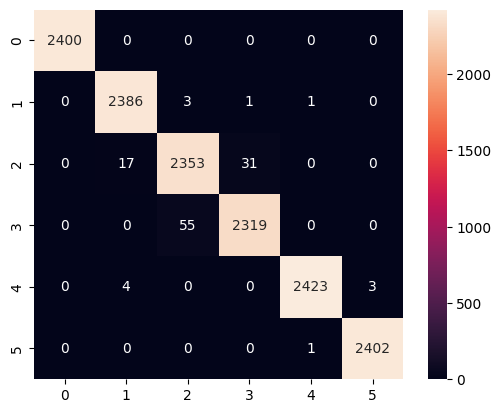

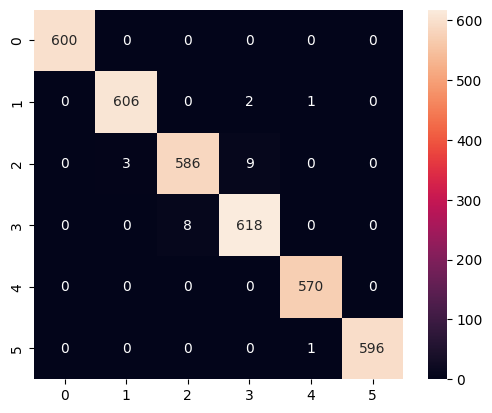

In [ ]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)
Y_pred_nro = np.argmax(Y_pred,axis=1)  #-- "conversión a entero"

Y_true = np.argmax(Y_train,axis=1)
print('\n','-'*80, '\n')
print("Porcentaje de aciertos X_train : %.3f%%" % (100*metrics.accuracy_score(Y_true, Y_pred_nro)))

report = metrics.classification_report(Y_true, Y_pred_nro)
print("Reporte de métricas de entrenamiento:\n%s" % report)
cm = metrics.confusion_matrix(Y_true, Y_pred_nro)

plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')

# %% --- VALIDACION ---
Y_pred = model.predict(X_val)
Y_pred_nro = np.argmax(Y_pred,axis=1)  #-- conversión a entero

Y_true = np.argmax(Y_val,axis=1)
print('\n','-'*80, '\n')
print("Porcentaje de aciertos X_val : %.3f%%" % (100*metrics.accuracy_score(Y_true, Y_pred_nro)))

report = metrics.classification_report(Y_true, Y_pred_nro)
print("Reporte de métricas de validación:\n%s" % report)

cm = metrics.confusion_matrix(Y_true, Y_pred_nro)
plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')

**Gráficos con evolución de curvas de loss y accuracy**




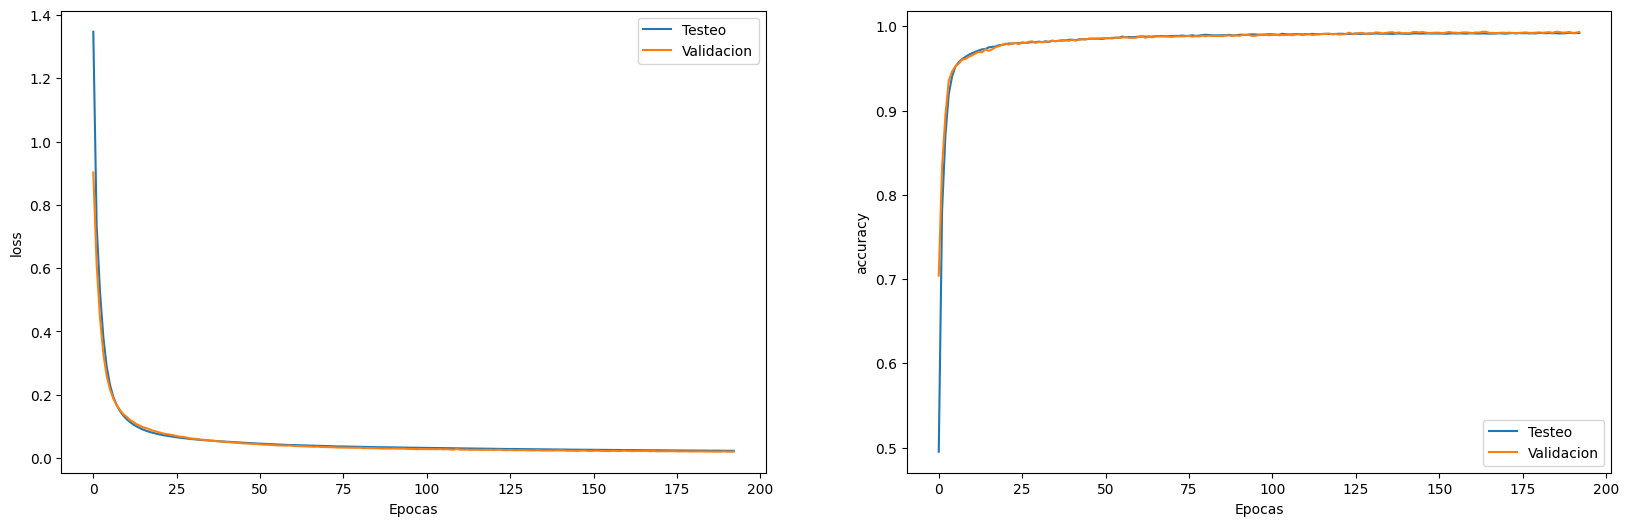

In [ ]:
hist = history.history

def dibujar_curva(axs, value, epocas, hist):
    axs.plot(epocas, hist[value], label='Testeo')
    axs.plot(history.epoch, hist['val_'+value], label = 'Validacion')

    axs.set(xlabel="Epocas", ylabel=value)
    axs.legend()

fig, axs = plt.subplots(1,2, figsize=(20,6))

dibujar_curva(axs[0], 'loss', history.epoch, hist)
dibujar_curva(axs[1], 'accuracy', history.epoch, hist)
